<a href="https://colab.research.google.com/github/sushkbura/MiniProject_Logistic_Regression/blob/main/Sushmitha_MLE_MiniProject_Logistic_Regression.ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [34]:
# Load dataset
cancer = load_breast_cancer()

# Put into a DataFrame
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

# Feature matrix and target vector
X = df.drop('target', axis=1)
y = df['target']


In [35]:
#First 5 rows of the dataset
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             


Target distribution (counts):

target
1    357
0    212
Name: count, dtype: int64


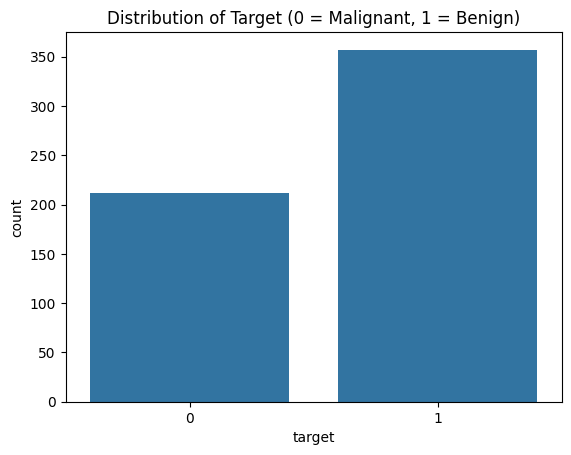

In [36]:
# How frequently does the positive target occur?
print("\nTarget distribution (counts):\n")
print(df['target'].value_counts())

sns.countplot(x='target', data=df)
plt.title("Distribution of Target (0 = Malignant, 1 = Benign)")
plt.show()

In [37]:
# Generate summary statistics for the data
print("\nSummary statistics:\n")
print(df.describe())


Summary statistics:

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000            

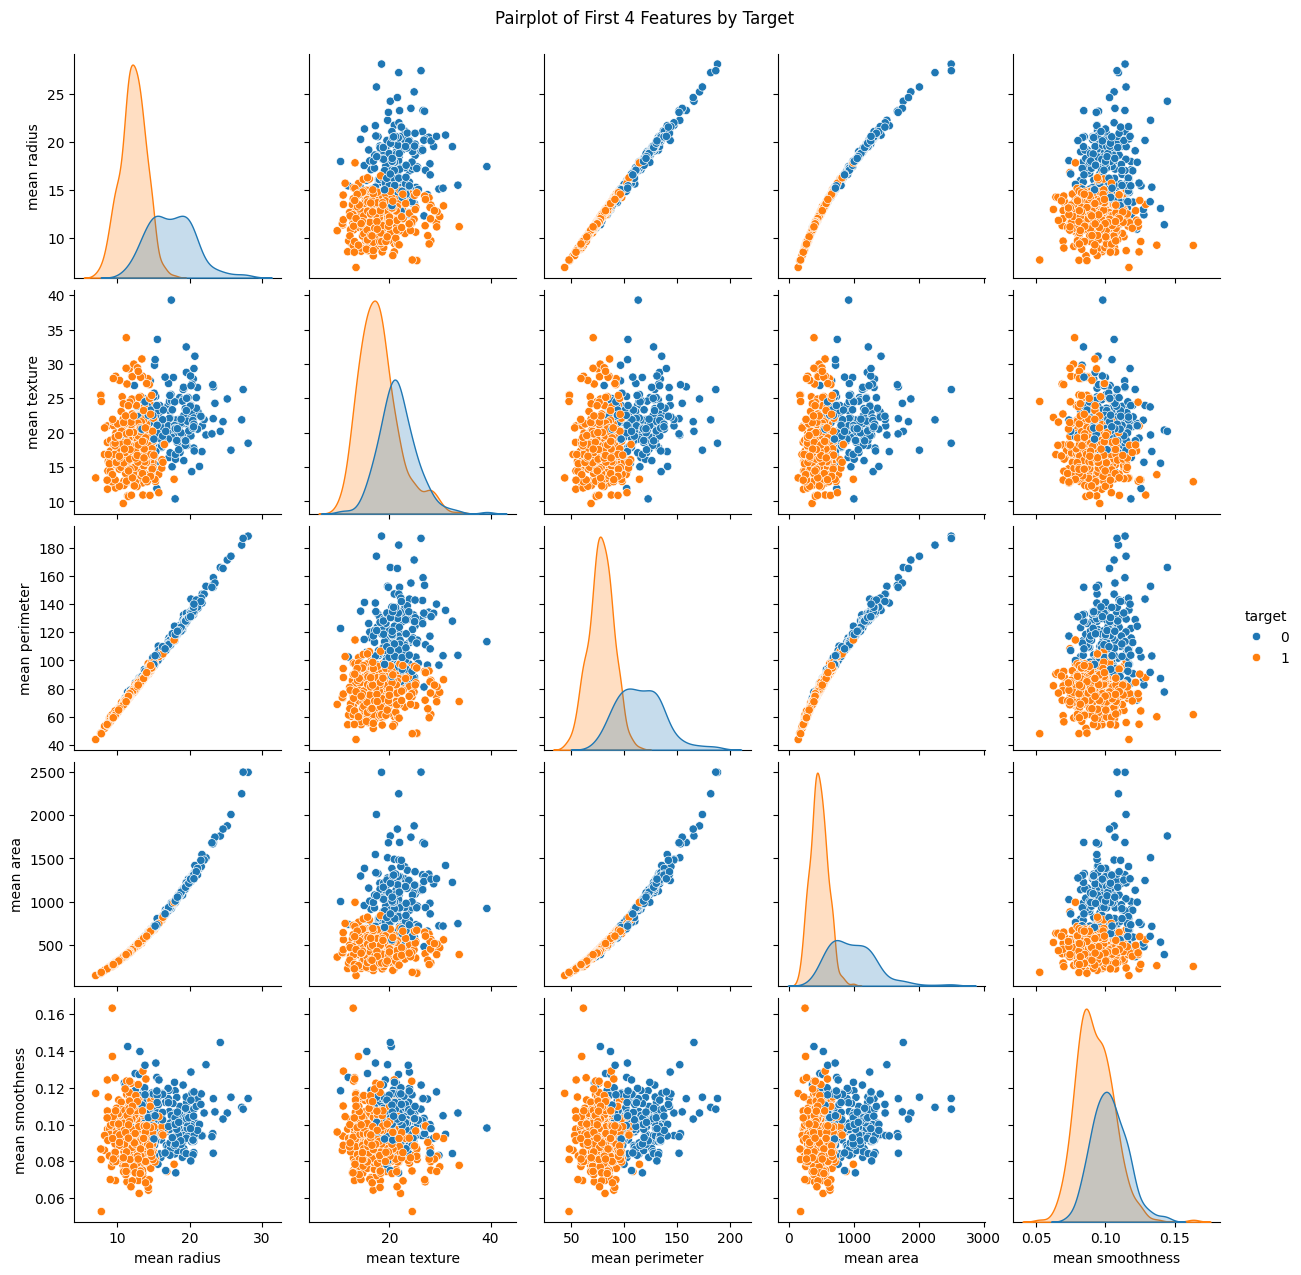

In [38]:
# Create a pairplot for the first few features
sns.pairplot(df.iloc[:, :5].join(df['target']), hue="target", diag_kind="kde")
plt.suptitle("Pairplot of First 4 Features by Target", y=1.02)
plt.show()

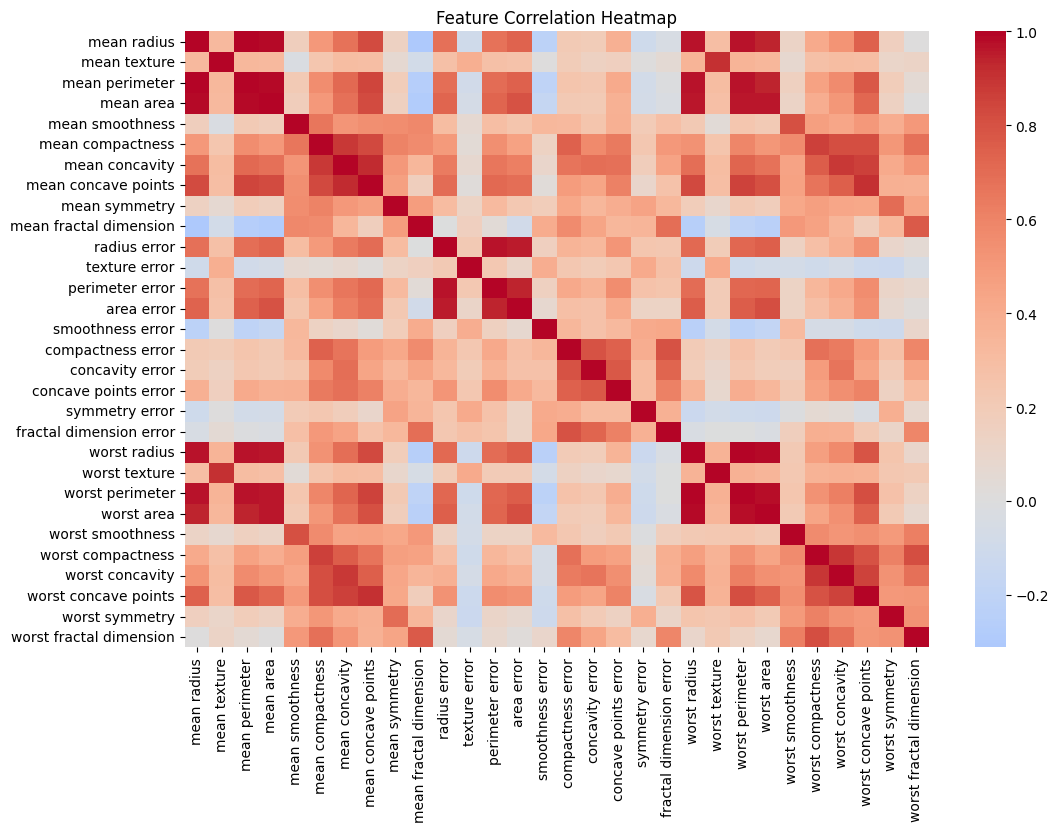

In [39]:
# Create a correlation coefficeint heatmap
plt.figure(figsize=(12, 8))
corr = df.drop(columns='target').corr()
sns.heatmap(corr, cmap="coolwarm", center=0, annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

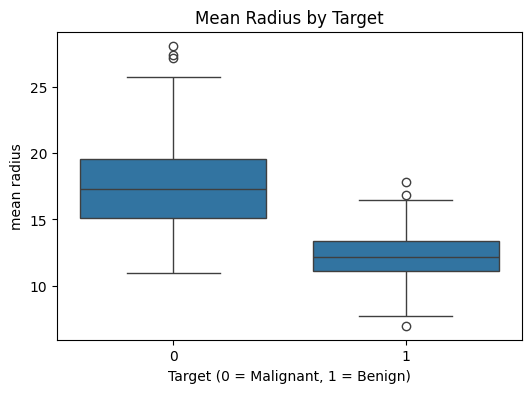

In [40]:
# Create a boxplot for mean radius by target type
plt.figure(figsize=(6, 4))
sns.boxplot(x="target", y="mean radius", data=df)
plt.title("Mean Radius by Target")
plt.xlabel("Target (0 = Malignant, 1 = Benign)")
plt.show()

In [41]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

In [42]:
# Build and train logistic regression model
log_reg = LogisticRegression(solver="liblinear", max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [43]:
# Evaluate the model

y_pred = log_reg.predict(X_test)

print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))


Model Evaluation:
Accuracy: 0.956140350877193


In [44]:
# Generate a confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[39  3]
 [ 2 70]]


In [45]:
# Generate a classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))


Classification Report:
               precision    recall  f1-score   support

           0      0.951     0.929     0.940        42
           1      0.959     0.972     0.966        72

    accuracy                          0.956       114
   macro avg      0.955     0.950     0.953       114
weighted avg      0.956     0.956     0.956       114



In [46]:
# Extract coefficients
coefficients = log_reg.coef_[0]
feature_names = X.columns

In [47]:
# Normalize the coefficients by the standard deviation
feature_std = X_train.std(axis=0)
normalized_coeffs = coefficients / feature_std

In [49]:
# Sort feature names and coefficients by absolute value of coefficients
importance_df = pd.DataFrame({
    "feature": feature_names,
    "coefficient": normalized_coeffs,
    "abs_coeff": np.abs(normalized_coeffs)
}).sort_values(by="abs_coeff", ascending=False)


Top 10 Important Features:
                                    feature  coefficient  abs_coeff
worst smoothness          worst smoothness   -11.768336  11.768336
worst symmetry              worst symmetry   -11.702220  11.702220
mean smoothness            mean smoothness   -10.816398  10.816398
mean symmetry                mean symmetry    -9.481854   9.481854
worst concave points  worst concave points    -9.258867   9.258867
mean concave points    mean concave points    -7.806396   7.806396
worst compactness        worst compactness    -7.383740   7.383740
worst concavity            worst concavity    -7.312871   7.312871
mean concavity              mean concavity    -7.263413   7.263413
mean compactness          mean compactness    -7.124712   7.124712


/tmp/ipython-input-2314806864.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


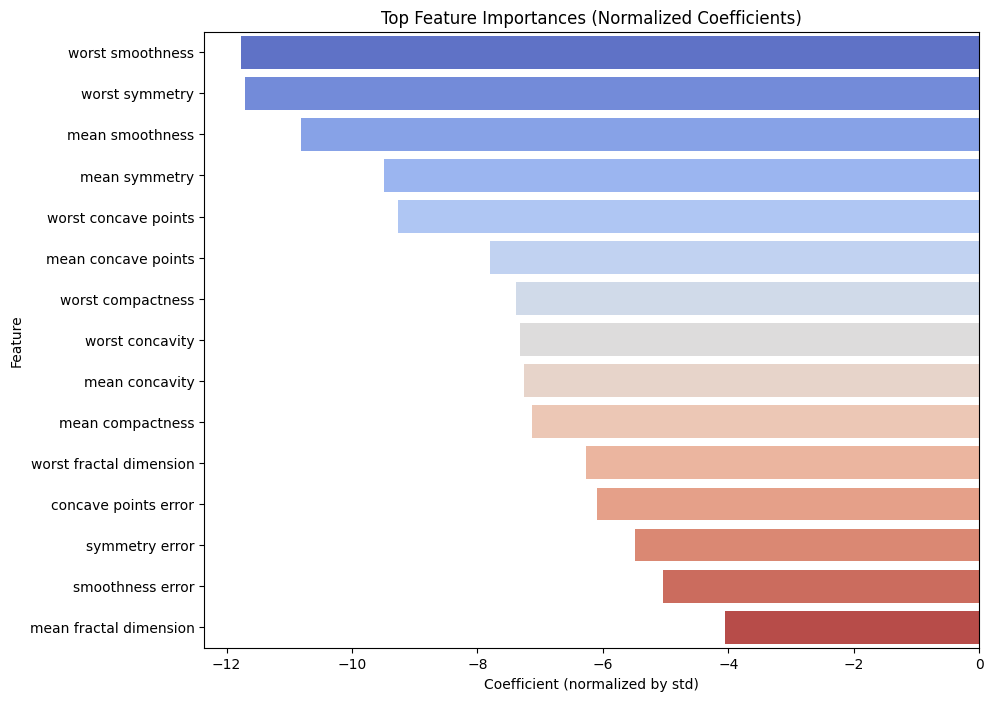

In [50]:
# Visualize feature importances
print("\nTop 10 Important Features:\n", importance_df.head(10))

# Plot horizontal bar chart
plt.figure(figsize=(10, 8))
sns.barplot(
    x="coefficient",
    y="feature",
    data=importance_df.head(15),
    palette="coolwarm"
)
plt.title("Top Feature Importances (Normalized Coefficients)")
plt.xlabel("Coefficient (normalized by std)")
plt.ylabel("Feature")
plt.show()